### Clustering Analysis

- loads in previously generated dataset containing standardized gene expression levels for the top 5,000 varaible genes and top 10 sample sizes for tissue type
    - saved as "standardized_gtex_data.csv"

- Utilizes two clustering algorithms
    - 1. DBSCAN
    - 2. Spectral clustering


author: @emilyekstrum <br>
11/29/25

In [ ]:
# load in modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from collections import Counter

### Load in saved standardized dataframe

In [ ]:
standardized_df = pd.read_csv('standardized_gtex_data.csv', index_col=0)
# check standardized data
print(f"Data shape: {standardized_df.shape}")
print(f"Tissue types: {standardized_df['Tissue'].value_counts()}")
standardized_df.head()

Data shape: (12385, 5001)
Tissue types: Tissue
Brain             2642
Skin              1809
Esophagus         1445
Blood Vessel      1335
Adipose Tissue    1204
Blood              929
Heart              861
Muscle             803
Colon              779
Lung               578
Name: count, dtype: int64


,ENSG00000244734.3,ENSG00000210082.2,ENSG00000198804.2,ENSG00000198712.1,ENSG00000198938.2,ENSG00000188536.12,ENSG00000198899.2,ENSG00000198886.2,ENSG00000275896.5,ENSG00000163220.10,...,ENSG00000176749.8,ENSG00000241973.10,ENSG00000118689.14,ENSG00000167680.15,ENSG00000148053.15,ENSG00000134291.11,ENSG00000183578.6,ENSG00000164091.11,ENSG00000173418.11,Tissue
SampleID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,-0.224060,-0.705245,-0.989040,-1.181744,-0.827381,-0.227056,-1.100396,-1.152899,-0.046299,-0.274221,...,-0.410148,-0.223763,0.927145,0.056044,0.003949,-0.728237,1.017498,0.556156,0.709088,Adipose Tissue
GTEX-1117F-0426-SM-5EGHI,-0.226988,-0.568362,-0.071033,-0.000229,1.174367,-0.229158,0.761313,-0.044948,0.070481,-0.274748,...,-0.422089,-0.833863,2.706245,-0.449185,-0.614181,-1.073516,-0.848246,-0.619127,1.387009,Muscle
GTEX-1117F-0526-SM-5EGHJ,-0.226422,-0.712248,-1.033332,-1.157453,-0.848022,-0.228702,-0.982716,-1.080163,0.352145,-0.275248,...,-0.422842,-0.287294,1.328017,0.360329,-0.052695,-0.119439,2.315288,0.029910,0.156455,Blood Vessel
GTEX-1117F-0626-SM-5N9CS,-0.161889,-0.505374,-1.251368,-1.231699,-0.989228,-0.176141,-0.978777,-1.173901,-0.036921,-0.262209,...,-0.414532,0.029668,0.862888,0.241142,0.109683,0.852570,0.699360,0.482631,0.339706,Blood Vessel
GTEX-1117F-0726-SM-5GIEN,-0.209040,0.495740,0.857836,0.078600,1.272882,-0.214496,2.280813,1.764244,-0.023293,-0.278531,...,-0.455955,-0.784144,-0.606612,-0.303565,-0.469075,-0.507169,-0.642490,-1.129325,-0.711197,Heart


# Clustering

In [ ]:
# separate features (gene expression) from labels (tissue)
df_features = standardized_df.drop('Tissue', axis=1)
tissue_labels = standardized_df['Tissue']

# check features and labels dataframes
print(f"Features dataframe shape: {df_features.shape}")
print(f"Number of tissue types: {len(tissue_labels.unique())}")

Features dataframe shape: (12385, 5000)
Number of tissue types: 10


### Method 1: DBSCAN

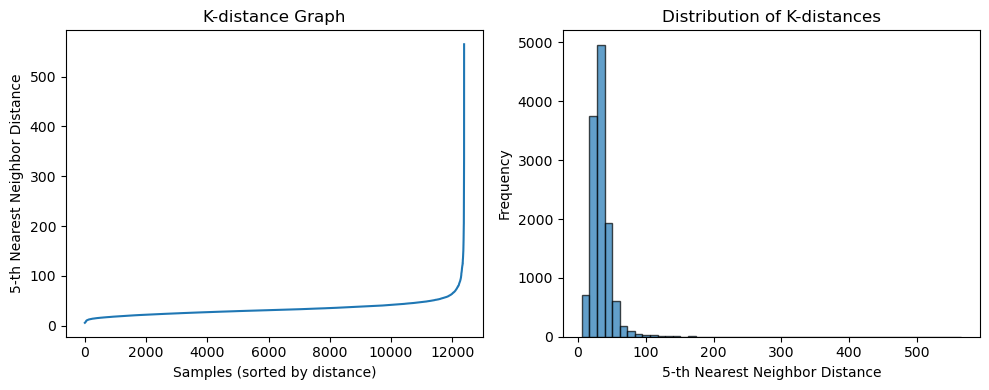


best eps value: 38.73


In [ ]:
# use distance (k distance to nearest neighbor) distribution to choose eps

# k-distances to determine optimal eps
k = 5  # min_samples - 1
nbrs = NearestNeighbors(n_neighbors=k).fit(df_features)
distances, indices = nbrs.kneighbors(df_features)

# sort distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, k-1], axis=0)

# plot k-distance graph and histogram
# k-distance graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_distances)
plt.title('K-distance Graph')
plt.xlabel('Samples (sorted by distance)')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.grid(False)

# histogram of k-distances
plt.subplot(1, 2, 2)
plt.hist(k_distances, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of K-distances')
plt.xlabel(f'{k}-th Nearest Neighbor Distance')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()

# best eps value (elbow or median)
best_eps = np.percentile(k_distances, 75)
print(f"\nbest eps value: {best_eps:.2f}")

In [ ]:
# DBSCAN clustering with best eps value
dbscan = DBSCAN(eps=best_eps, min_samples=5).fit(df_features)
cluster_labels = dbscan.labels_

# clustering metrics
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)
print(f'Using eps={best_eps:.2f}:')
print(f'Est. number of clusters: {n_clusters_}')
print(f'Est. number of noise points: {n_noise_}')
print(f'Percentage of noise: {n_noise_/len(cluster_labels)*100:.1f}%')

Using eps=38.73:
Est. number of clusters: 7
Est. number of noise points: 2309
Percentage of noise: 18.6%


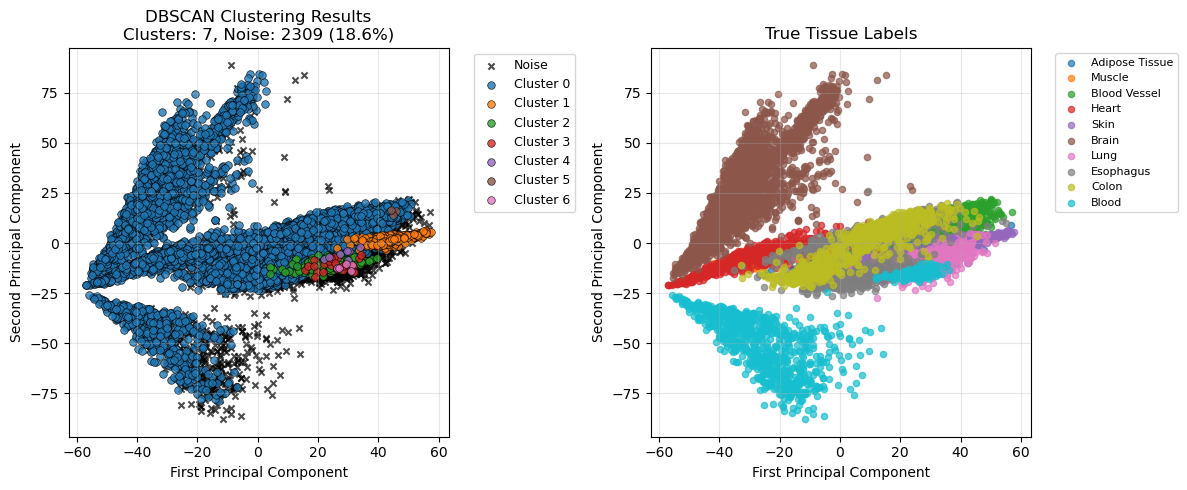

In [32]:
# visualize DBSCAN clustering result using PCA dimensionalith reduction
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_features)

plt.figure(figsize=(12, 5))

# clustering results - color by cluster
plt.subplot(1, 2, 1)
unique_labels = set(cluster_labels)
n_clusters_for_colors = len(unique_labels) - (1 if -1 in unique_labels else 0)

# colors for each cluster
if n_clusters_for_colors > 0:
    cluster_colors = plt.cm.tab10(np.linspace(0, 1, max(10, n_clusters_for_colors)))
else:
    cluster_colors = []

for i, k in enumerate(sorted(unique_labels)):
    class_member_mask = (cluster_labels == k)
    xy = df_pca[class_member_mask]
    
    if k == -1:
        # black points = noise
        plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=20, alpha=0.7, label='Noise')
    else:
        # colored points = clusters
        color_idx = k % len(cluster_colors) if len(cluster_colors) > 0 else 0
        plt.scatter(xy[:, 0], xy[:, 1], c=[cluster_colors[color_idx]], marker='o', 
                   s=30, alpha=0.8, label=f'Cluster {k}', edgecolors='black', linewidth=0.5)

plt.title(f'DBSCAN Clustering Results\nClusters: {n_clusters_}, Noise: {n_noise_} ({n_noise_/len(cluster_labels)*100:.1f}%)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)

# ground truth tissue labels
plt.subplot(1, 2, 2)
unique_tissues = tissue_labels.unique()
tissue_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_tissues)))
for i, tissue in enumerate(unique_tissues):
    tissue_mask = (tissue_labels == tissue)
    xy = df_pca[tissue_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[tissue_colors[i]], marker='o', s=20, alpha=0.7, label=tissue)

plt.title('True Tissue Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
# print cluster composition
if n_clusters_ > 0:
    print("\nCluster composition:")
    for cluster_id in sorted(set(cluster_labels)):
        cluster_mask = (cluster_labels == cluster_id)
        cluster_size = np.sum(cluster_mask)
        if cluster_id == -1:
            print(f"Noise points: {cluster_size} samples")
        else:
            print(f"Cluster {cluster_id}: {cluster_size} samples")
            # Show tissue composition within this cluster
            cluster_tissues = tissue_labels[cluster_mask].value_counts()
            print(f"  Most common tissues: {cluster_tissues.head(3).to_dict()}")


Cluster composition:
Noise points: 2309 samples
Cluster 0: 9425 samples
  Most common tissues: {'Brain': 2535, 'Esophagus': 1266, 'Skin': 1144}
Cluster 1: 482 samples
  Most common tissues: {'Skin': 482}
Cluster 2: 131 samples
  Most common tissues: {'Lung': 131}
Cluster 3: 23 samples
  Most common tissues: {'Lung': 23}
Cluster 4: 7 samples
  Most common tissues: {'Lung': 7}
Cluster 5: 3 samples
  Most common tissues: {'Blood Vessel': 3}
Cluster 6: 5 samples
  Most common tissues: {'Blood': 5}


### DBSCAN with PCA dimensionality reduction before clustering

In [ ]:
# PCA with n_components to retain 85% variance
pca = PCA(n_components=0.85, random_state=42)
df_pca = pca.fit_transform(df_features)

# n components chosen
n_components_chosen = pca.n_components_
print(f"\nNumber of PCA components to retain 85% variance: {n_components_chosen}")

In [37]:
# fit DBSCAN on PCA-reduced data
dbscan_pca = DBSCAN(eps=best_eps, min_samples=5).fit(df_pca)
cluster_labels_pca = dbscan_pca.labels_
# clustering metrics for PCA-reduced data
n_clusters_pca = len(set(cluster_labels_pca)) - (1 if -1 in cluster_labels_pca else 0)
n_noise_pca = list(cluster_labels_pca).count(-1)
print(f'\nDBSCAN on PCA-reduced data (eps={best_eps:.2f}):')
print(f'Est. number of clusters: {n_clusters_pca}')
print(f'Est. number of noise points: {n_noise_pca}')
print(f'Percentage of noise: {n_noise_pca/len(cluster_labels_pca)*100:.1f}%')


DBSCAN on PCA-reduced data (eps=38.73):
Est. number of clusters: 4
Est. number of noise points: 160
Percentage of noise: 1.3%


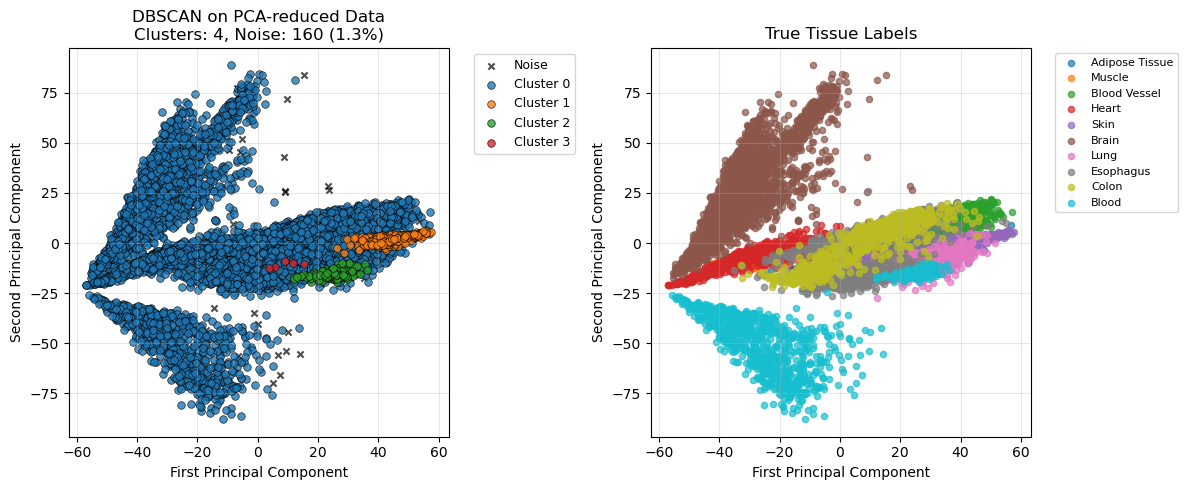

In [39]:
# plot the clusters
plt.figure(figsize=(12, 5))

# clustering results - color by cluster
plt.subplot(1, 2, 1)

unique_labels_pca = set(cluster_labels_pca)
n_clusters_for_colors_pca = len(unique_labels_pca) - (1 if -1 in unique_labels_pca else 0)
# colors for each cluster
if n_clusters_for_colors_pca > 0:
    cluster_colors_pca = plt.cm.tab10(np.linspace(0, 1, max(10, n_clusters_for_colors_pca)))
else:
    cluster_colors_pca = []
for i, k in enumerate(sorted(unique_labels_pca)):
    class_member_mask = (cluster_labels_pca == k)
    xy = df_pca[class_member_mask]  
    if k == -1:
        # black points = noise
        plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x', s=20, alpha=0.7, label='Noise')
    else:
        # colored points = clusters
        color_idx = k % len(cluster_colors_pca) if len(cluster_colors_pca) > 0 else 0
        plt.scatter(xy[:, 0], xy[:, 1], c=[cluster_colors_pca[color_idx]], marker='o', 
                   s=30, alpha=0.8, label=f'Cluster {k}', edgecolors='black', linewidth=0.5)
plt.title(f'DBSCAN on PCA-reduced Data\nClusters: {n_clusters_pca}, Noise: {n_noise_pca} ({n_noise_pca/len(cluster_labels_pca)*100:.1f}%)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)

# ground truth tissue labels
plt.subplot(1, 2, 2)
unique_tissues = tissue_labels.unique()
tissue_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_tissues)))
for i, tissue in enumerate(unique_tissues):
    tissue_mask = (tissue_labels == tissue)
    xy = df_pca[tissue_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[tissue_colors[i]], marker='o', s=20, alpha=0.7, label=tissue)

plt.title('True Tissue Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

In [41]:
# print cluster composition
if n_clusters_ > 0:
    print("\nCluster composition:")
    for cluster_id in sorted(set(cluster_labels_pca)):
        cluster_mask = (cluster_labels == cluster_id)
        cluster_size = np.sum(cluster_mask)
        if cluster_id == -1:
            print(f"Noise points: {cluster_size} samples")
        else:
            print(f"Cluster {cluster_id}: {cluster_size} samples")
            # Show tissue composition within this cluster
            cluster_tissues = tissue_labels[cluster_mask].value_counts()
            print(f"  Most common tissues: {cluster_tissues.head(3).to_dict()}")


Cluster composition:
Noise points: 2309 samples
Cluster 0: 9425 samples
  Most common tissues: {'Brain': 2535, 'Esophagus': 1266, 'Skin': 1144}
Cluster 1: 482 samples
  Most common tissues: {'Skin': 482}
Cluster 2: 131 samples
  Most common tissues: {'Lung': 131}
Cluster 3: 23 samples
  Most common tissues: {'Lung': 23}


### Method 2: Spectral Clustering